# Sleep Inference Graphs

In [109]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz

## Cheryl

### Clean the sleep data

In [110]:
# Import sleep data csv
sleep_df = pd.read_csv("raw_data/CB_data/cheryl_sleep_data.csv")
sleep_df.head(2)

,Unnamed: 0,Date,total_sleep_hours,sleep_start,sleep_end
0,0,2022-12-19,16.689444,2022-12-18 23:59:55-05:00,2022-12-19 10:31:52-05:00
1,1,2022-12-20,16.621667,2022-12-19 23:56:03-05:00,2022-12-20 09:32:16-05:00


In [111]:
# Rename columns
sleep_df["Date"] = pd.to_datetime(sleep_df["Date"])
sleep_df = sleep_df.rename(columns={"Date": "date"})
sleep_df = sleep_df.drop(columns=["Unnamed: 0"])
sleep_df.head(2)

,date,total_sleep_hours,sleep_start,sleep_end
0,2022-12-19,16.689444,2022-12-18 23:59:55-05:00,2022-12-19 10:31:52-05:00
1,2022-12-20,16.621667,2022-12-19 23:56:03-05:00,2022-12-20 09:32:16-05:00


In [112]:
# Separate sleep start date/time and sleep end date/time
sleep_df["sleep_start"] = pd.to_datetime(sleep_df["sleep_start"])
sleep_df["sleep_end"] = pd.to_datetime(sleep_df["sleep_end"])

sleep_df["sleep_start_date"] = sleep_df['sleep_start'].dt.date
sleep_df["sleep_start_time"] = sleep_df["sleep_start"].dt.strftime("%H:%M:%S")
sleep_df["sleep_end_date"] = sleep_df['sleep_end'].dt.date
sleep_df["sleep_end_time"] = sleep_df["sleep_end"].dt.strftime("%H:%M:%S")
sleep_df.head(2)

,date,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
0,2022-12-19,16.689444,2022-12-18 23:59:55-05:00,2022-12-19 10:31:52-05:00,2022-12-18,23:59:55,2022-12-19,10:31:52
1,2022-12-20,16.621667,2022-12-19 23:56:03-05:00,2022-12-20 09:32:16-05:00,2022-12-19,23:56:03,2022-12-20,09:32:16


In [113]:
# Combine with Chrome history
df = pd.read_csv("cleaned_data/cheryl_chrome.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.drop(columns=["Unnamed: 0"])
df = pd.merge(df, sleep_df, on="date", how="right")
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,eqk9vb,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
0,2022-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.689444,2022-12-18 23:59:55-05:00,2022-12-19 10:31:52-05:00,2022-12-18,23:59:55,2022-12-19,10:31:52
1,2022-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.621667,2022-12-19 23:56:03-05:00,2022-12-20 09:32:16-05:00,2022-12-19,23:56:03,2022-12-20,09:32:16


In [114]:
# Truncate to correct date range 1/1/2025-2/17/2025
start_date = "2025-01-01"
end_date = "2025-02-17"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
df = df.sort_values("date")
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,eqk9vb,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
740,2025-01-01,02:05:20,dsw - Google Search,22:56:56,Amazon.com : daisque,43.0,28.0,0.0,15.0,0.0,22:56:56,8.258333,2025-01-01 02:04:45-05:00,2025-01-01 10:30:15-05:00,2025-01-01,02:04:45,2025-01-01,10:30:15
741,2025-01-02,01:46:11,Club Figure Skating Spring 2024 Off Ice - When...,02:52:13,Amazon.com : rice mask,0.0,0.0,0.0,0.0,0.0,02:52:13,11.283333,2025-01-02 01:25:02-05:00,2025-01-02 16:03:02-05:00,2025-01-02,01:25:02,2025-01-02,16:03:02


In [115]:
# Add day of the week feature
df['day_of_week'] = df['date'].dt.day_name()
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,eqk9vb,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time,day_of_week
740,2025-01-01,02:05:20,dsw - Google Search,22:56:56,Amazon.com : daisque,43.0,28.0,0.0,15.0,0.0,22:56:56,8.258333,2025-01-01 02:04:45-05:00,2025-01-01 10:30:15-05:00,2025-01-01,02:04:45,2025-01-01,10:30:15,Wednesday
741,2025-01-02,01:46:11,Club Figure Skating Spring 2024 Off Ice - When...,02:52:13,Amazon.com : rice mask,0.0,0.0,0.0,0.0,0.0,02:52:13,11.283333,2025-01-02 01:25:02-05:00,2025-01-02 16:03:02-05:00,2025-01-02,01:25:02,2025-01-02,16:03:02,Thursday


### Data visualizations

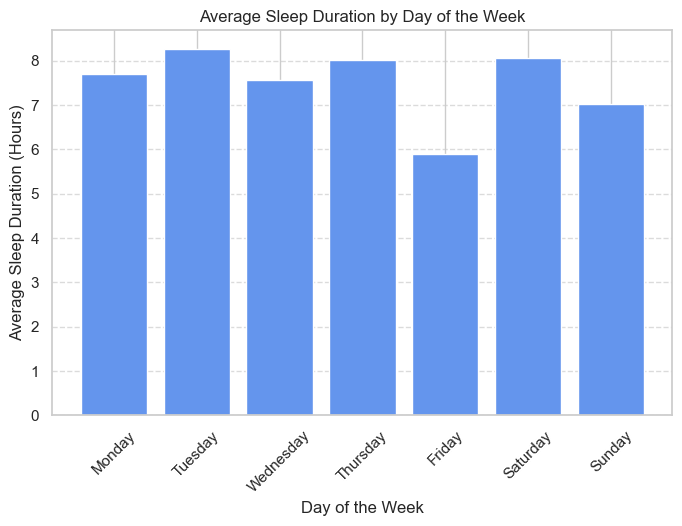

In [116]:
# AVERAGE SLEEP DURATION BY DAY OF THE WEEK

# Calculate the average sleep duration by day of the week
avg_sleep_by_day = df.groupby('day_of_week')['total_sleep_hours'].mean()

# Reorder days for correct visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sleep_by_day = avg_sleep_by_day.reindex(day_order)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_sleep_by_day.index, avg_sleep_by_day.values, color='cornflowerblue')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Sleep Duration (Hours)')
plt.title('Average Sleep Duration by Day of the Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


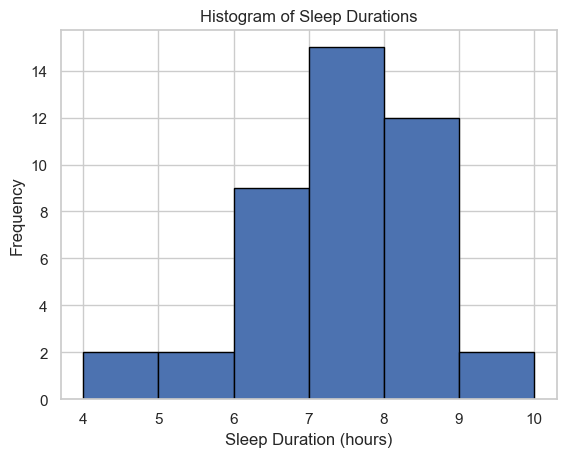

In [117]:
# HISTOGRAM OF SLEEP DURATIONS
# Create histogram with custom bins (e.g., one bin per hour from 4 to 10)
bins = range(4, 11)

plt.hist(df["total_sleep_hours"], bins=bins, edgecolor='black')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Durations')
plt.xticks(bins)

plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3519525208.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visited_time'] = pd.to_datetime(df['last_visited_time'])
C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3519525208.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['first_visited_time'] = pd.to_datetime(df['first_visited_time'])


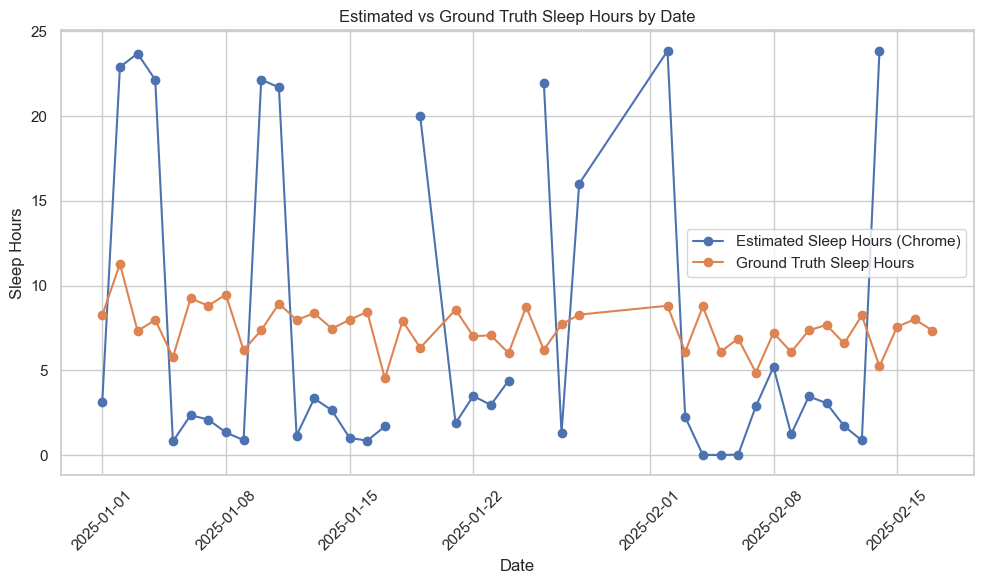

In [118]:
# CHROME HISTORY ESTIMATED SLEEP HOURS VS. GROUND TRUTH HEALTH SLEEP HOURS
df['last_visited_time'] = pd.to_datetime(df['last_visited_time'])
df['first_visited_time'] = pd.to_datetime(df['first_visited_time'])

# Estimate duration based on Chrome
def compute_sleep_duration(row):
    start_time = row['last_visited_time']
    end_time = row['first_visited_time']
    
    # Adjust for crossing midnight
    if end_time < start_time:
        end_time += timedelta(days=1)
    
    duration = end_time - start_time
    hours = duration.total_seconds() / 3600
    return hours

# Apply the function to each row in the DataFrame
df['chrome_estimated_total_sleep_hours'] = df.apply(compute_sleep_duration, axis=1)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['chrome_estimated_total_sleep_hours'], label='Estimated Sleep Hours (Chrome)', marker='o')
plt.plot(df['date'], df['total_sleep_hours'], label='Ground Truth Sleep Hours', marker='o')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.title('Estimated vs Ground Truth Sleep Hours by Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

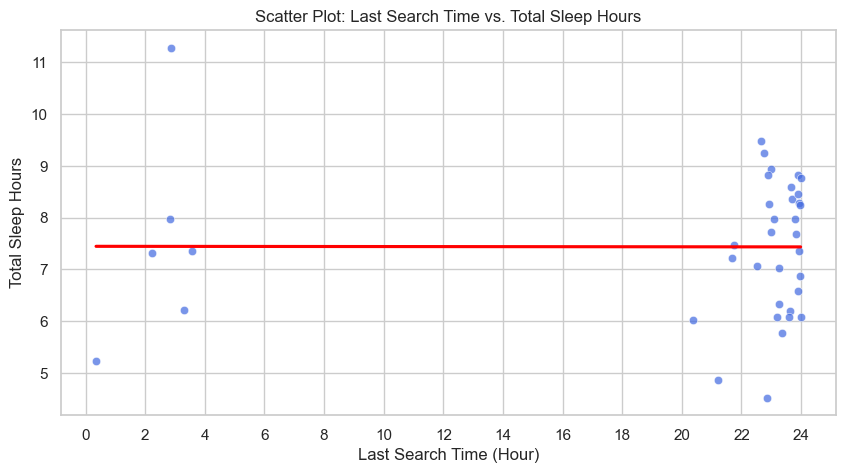

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3833994563.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm")


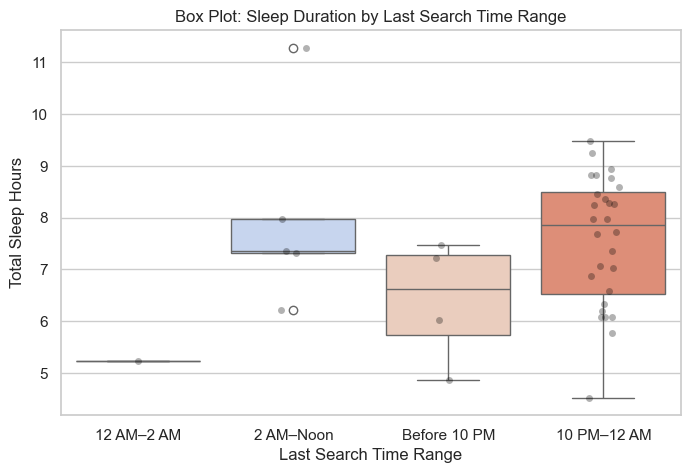

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3833994563.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")


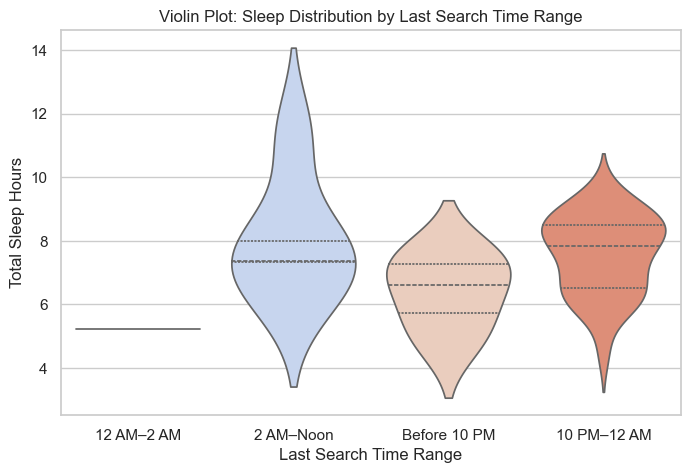

In [119]:
# LAST ACTIVITY TIME BY TOTAL SLEEP DURATION
sns.set_theme(style="whitegrid")

# Convert last search time into a numeric hour for plotting
df["last_search_hour"] = pd.to_datetime(df["last_visited_time"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(df["last_visited_time"], format="%H:%M:%S").dt.minute / 60
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="last_search_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=df, x="last_search_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Search Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Search Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

df["last_search_range"] = pd.cut(
    df["last_search_hour"],
    bins=[0, 2, 12, 22, 24],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["12 AM–2 AM", "2 AM–Noon", "Before 10 PM", "10 PM–12 AM"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=df, x="last_search_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Search Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Search Time Range")
plt.show()



Equation of trendline: y = -0.00073x + 7.59
R-squared: 0.005


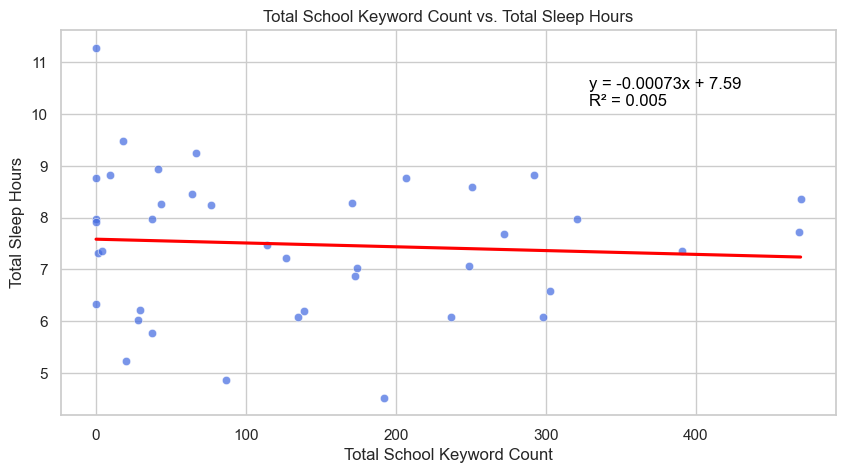

In [120]:
# TOTAL SCHOOL KEYWORD COUNT VS. TOTAL SLEEP HOURS
from scipy.stats import linregress

# Drop NaN values to avoid errors in regression calculation
filtered_df = df.dropna(subset=["total_school_keyword_count", "total_sleep_hours"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df["total_school_keyword_count"], filtered_df["total_sleep_hours"])

# Print equation
print(f"Equation of trendline: y = {slope:.5f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")  # R-squared value (goodness of fit)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_df, x="total_school_keyword_count", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=filtered_df, x="total_school_keyword_count", y="total_sleep_hours", scatter=False, color="red", ci=None)

# Add equation text to plot
equation_text = f"y = {slope:.5f}x + {intercept:.2f}\nR² = {r_value**2:.3f}"
plt.text(x=filtered_df["total_school_keyword_count"].max() * 0.7, 
         y=filtered_df["total_sleep_hours"].max() * 0.9, 
         s=equation_text, fontsize=12, color="black")

plt.xlabel("Total School Keyword Count")
plt.ylabel("Total Sleep Hours")
plt.title("Total School Keyword Count vs. Total Sleep Hours")
plt.show()

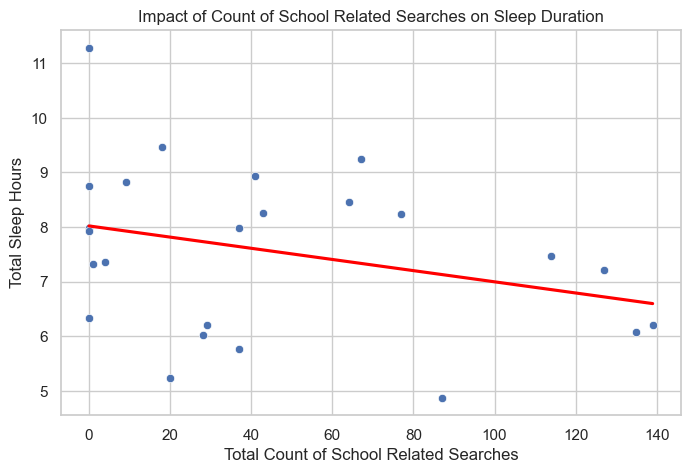

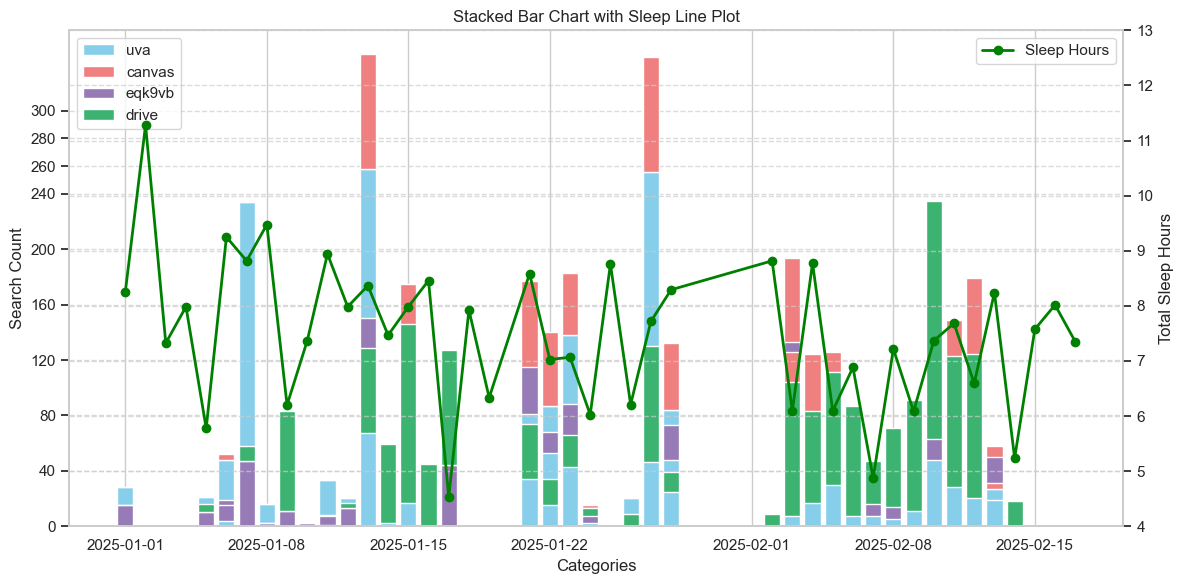

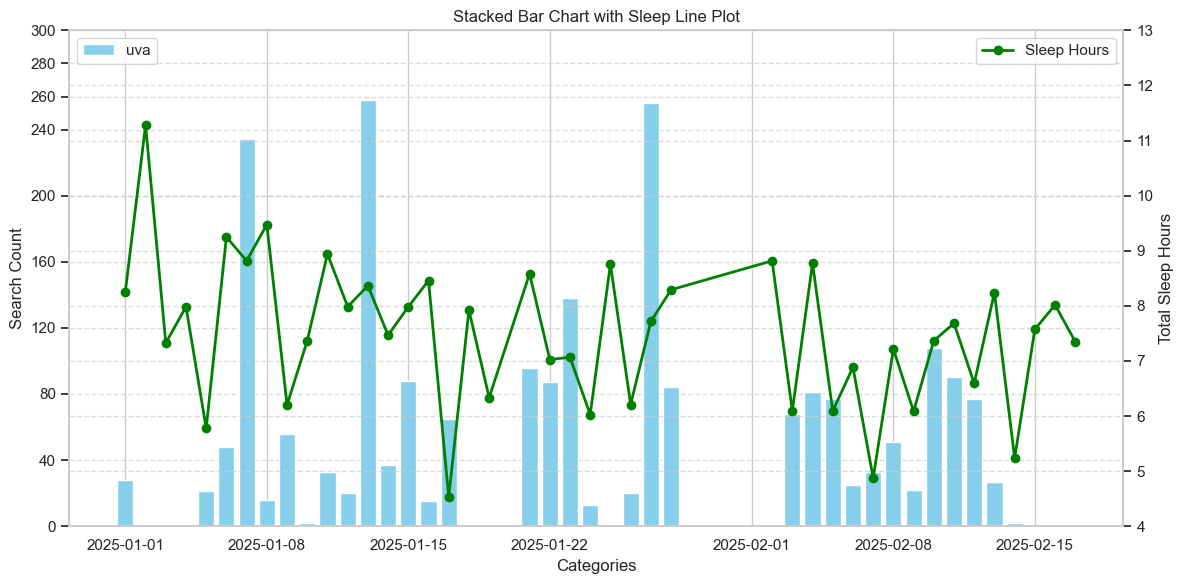

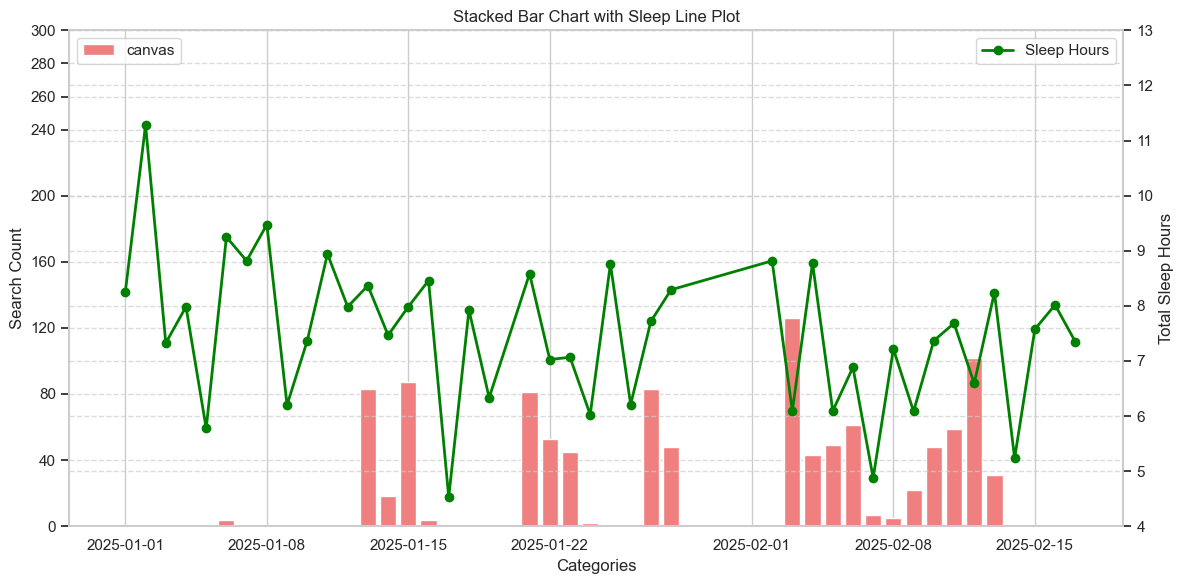

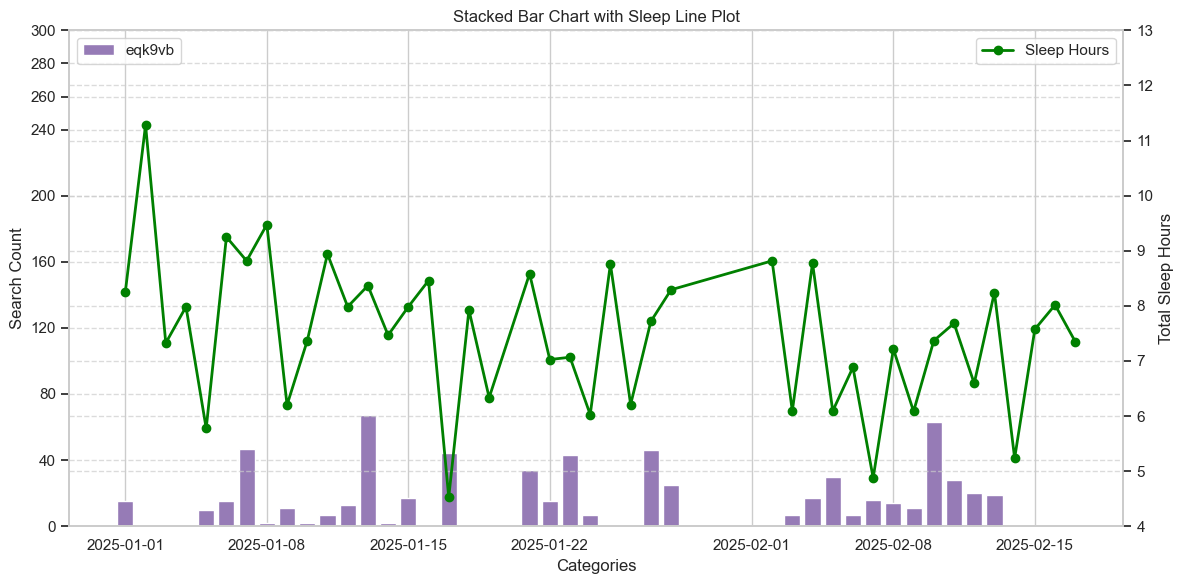

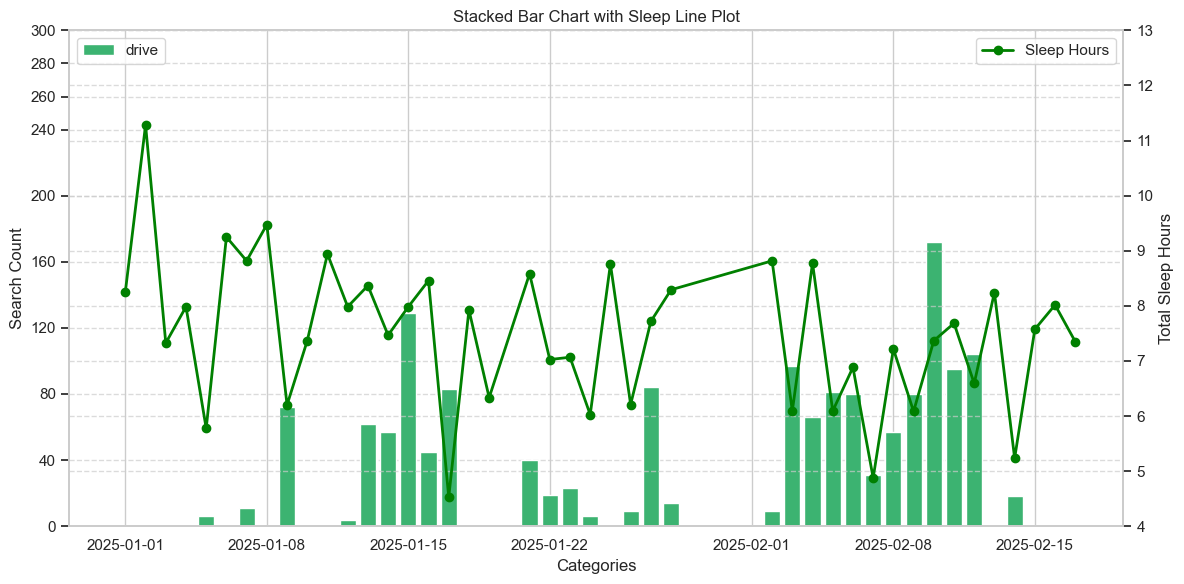

In [121]:
# Total count of school related keyword searches versus sleep hours
limit_search_remove_outliers = df[df['total_school_keyword_count'] <= 140]

plt.figure(figsize=(8,5))
sns.scatterplot(x=limit_search_remove_outliers['total_school_keyword_count'], y=limit_search_remove_outliers["total_sleep_hours"])
sns.regplot(data=limit_search_remove_outliers, x='total_school_keyword_count', y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Total Count of School Related Searches")
plt.ylabel("Total Sleep Hours")
plt.title("Impact of Count of School Related Searches on Sleep Duration")
plt.show()


# School related searches and sleep hours
categories = df['date']
data_series_1 = df['uva']
data_series_2 = df['canvas']
data_series_3 = df['eqk9vb']
data_series_4 = df['drive']
line_data = df['total_sleep_hours']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='uva', color='skyblue')
ax1.bar(categories, data_series_2, bottom=data_series_1, label='canvas', color='lightcoral')
ax1.bar(categories, data_series_3, bottom=data_series_2, label='eqk9vb', color='#967bb6')
ax1.bar(categories, data_series_4, bottom=data_series_3, label='drive', color='#3CB371')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# uva keyword searches
categories = df['date']
data_series_1 = df['uva']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='uva', color='skyblue')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# canvas keyword searches
categories = df['date']
data_series_1 = df['canvas']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='canvas', color='lightcoral')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# eqk9vb keyword searches
categories = df['date']
data_series_1 = df['eqk9vb']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='eqk9vb', color='#967bb6')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# drive keyword searches
categories = df['date']
data_series_1 = df['drive']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='drive', color='#3CB371')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Elaine

### Clean the sleep data

In [122]:
# Import sleep data csv
sleep_df = pd.read_csv("raw_data/EZ_data/elaine_sleep_data.csv")
sleep_df.head(2)

,Unnamed: 0,Date,total_sleep_hours,sleep_start,sleep_end
0,0,2021-08-29,7.737222,2021-08-28 23:30:00-05:00,2021-08-29 07:30:00-05:00
1,1,2021-09-30,7.203611,2021-09-29 23:17:47-05:00,2021-09-30 06:30:00-05:00


In [123]:
# Rename columns
sleep_df["Date"] = pd.to_datetime(sleep_df["Date"])
sleep_df = sleep_df.rename(columns={"Date": "date"})
sleep_df = sleep_df.drop(columns=["Unnamed: 0"])
sleep_df.head(2)

,date,total_sleep_hours,sleep_start,sleep_end
0,2021-08-29,7.737222,2021-08-28 23:30:00-05:00,2021-08-29 07:30:00-05:00
1,2021-09-30,7.203611,2021-09-29 23:17:47-05:00,2021-09-30 06:30:00-05:00


In [124]:
# Separate sleep start date/time and sleep end date/time
sleep_df["sleep_start"] = pd.to_datetime(sleep_df["sleep_start"])
sleep_df["sleep_end"] = pd.to_datetime(sleep_df["sleep_end"])

sleep_df["sleep_start_date"] = sleep_df['sleep_start'].dt.date
sleep_df["sleep_start_time"] = sleep_df["sleep_start"].dt.strftime("%H:%M:%S")
sleep_df["sleep_end_date"] = sleep_df['sleep_end'].dt.date
sleep_df["sleep_end_time"] = sleep_df["sleep_end"].dt.strftime("%H:%M:%S")
sleep_df.head(2)

,date,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
0,2021-08-29,7.737222,2021-08-28 23:30:00-05:00,2021-08-29 07:30:00-05:00,2021-08-28,23:30:00,2021-08-29,07:30:00
1,2021-09-30,7.203611,2021-09-29 23:17:47-05:00,2021-09-30 06:30:00-05:00,2021-09-29,23:17:47,2021-09-30,06:30:00


In [125]:
# Combine with Chrome history
df = pd.read_csv("cleaned_data/elaine_chrome.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.drop(columns=["Unnamed: 0"])
df = pd.merge(df, sleep_df, on="date", how="right")
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,zzb2rf,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
0,2021-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.737222,2021-08-28 23:30:00-05:00,2021-08-29 07:30:00-05:00,2021-08-28,23:30:00,2021-08-29,07:30:00
1,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.203611,2021-09-29 23:17:47-05:00,2021-09-30 06:30:00-05:00,2021-09-29,23:17:47,2021-09-30,06:30:00


In [126]:
# Truncate to correct date range 1/1/2025-2/17/2025
start_date = "2025-01-01"
end_date = "2025-02-17"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]
df = df.sort_values("date")
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,zzb2rf,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time
1188,2025-01-01,19:28:58,"Teleparty | Watch together on Netflix, Youtube...",20:49:10,Watch Eternal Love of Dream | Prime Video,0.0,0.0,0.0,0.0,0.0,20:49:10,7.566667,2025-01-01 01:58:50-05:00,2025-01-01 10:00:20-05:00,2025-01-01,01:58:50,2025-01-01,10:00:20
1189,2025-01-02,20:57:04,Online LaTeX Editor Overleaf,21:02:22,ChatGPT,0.0,0.0,0.0,0.0,0.0,21:02:22,6.608333,2025-01-02 02:10:26-05:00,2025-01-02 08:59:56-05:00,2025-01-02,02:10:26,2025-01-02,08:59:56


In [127]:
# Add day of the week feature
df['day_of_week'] = df['date'].dt.day_name()
df.head(2)

,date,first_visited_time,first_visited_chrome_title,last_visited_time,last_visited_chrome_title,total_school_keyword_count,uva,canvas,zzb2rf,drive,last_school_keyword_visit_time,total_sleep_hours,sleep_start,sleep_end,sleep_start_date,sleep_start_time,sleep_end_date,sleep_end_time,day_of_week
1188,2025-01-01,19:28:58,"Teleparty | Watch together on Netflix, Youtube...",20:49:10,Watch Eternal Love of Dream | Prime Video,0.0,0.0,0.0,0.0,0.0,20:49:10,7.566667,2025-01-01 01:58:50-05:00,2025-01-01 10:00:20-05:00,2025-01-01,01:58:50,2025-01-01,10:00:20,Wednesday
1189,2025-01-02,20:57:04,Online LaTeX Editor Overleaf,21:02:22,ChatGPT,0.0,0.0,0.0,0.0,0.0,21:02:22,6.608333,2025-01-02 02:10:26-05:00,2025-01-02 08:59:56-05:00,2025-01-02,02:10:26,2025-01-02,08:59:56,Thursday


### Data visualizations

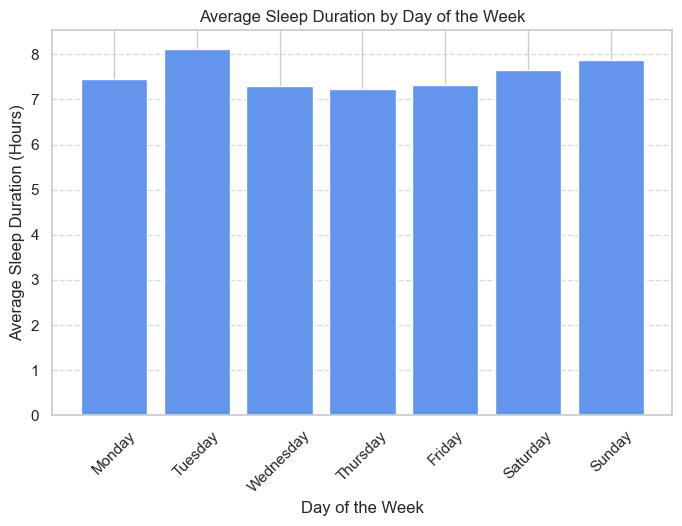

In [128]:
# AVERAGE SLEEP DURATION BY DAY OF THE WEEK

# Calculate the average sleep duration by day of the week
avg_sleep_by_day = df.groupby('day_of_week')['total_sleep_hours'].mean()

# Reorder days for correct visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sleep_by_day = avg_sleep_by_day.reindex(day_order)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_sleep_by_day.index, avg_sleep_by_day.values, color='cornflowerblue')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Sleep Duration (Hours)')
plt.title('Average Sleep Duration by Day of the Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


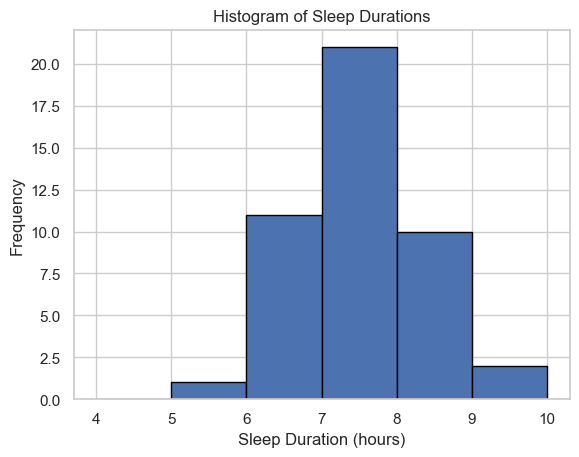

In [129]:
# HISTOGRAM OF SLEEP DURATIONS
# Create histogram with custom bins (e.g., one bin per hour from 4 to 10)
bins = range(4, 11)

plt.hist(df["total_sleep_hours"], bins=bins, edgecolor='black')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Durations')
plt.xticks(bins)

plt.show()

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3519525208.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visited_time'] = pd.to_datetime(df['last_visited_time'])
C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3519525208.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['first_visited_time'] = pd.to_datetime(df['first_visited_time'])


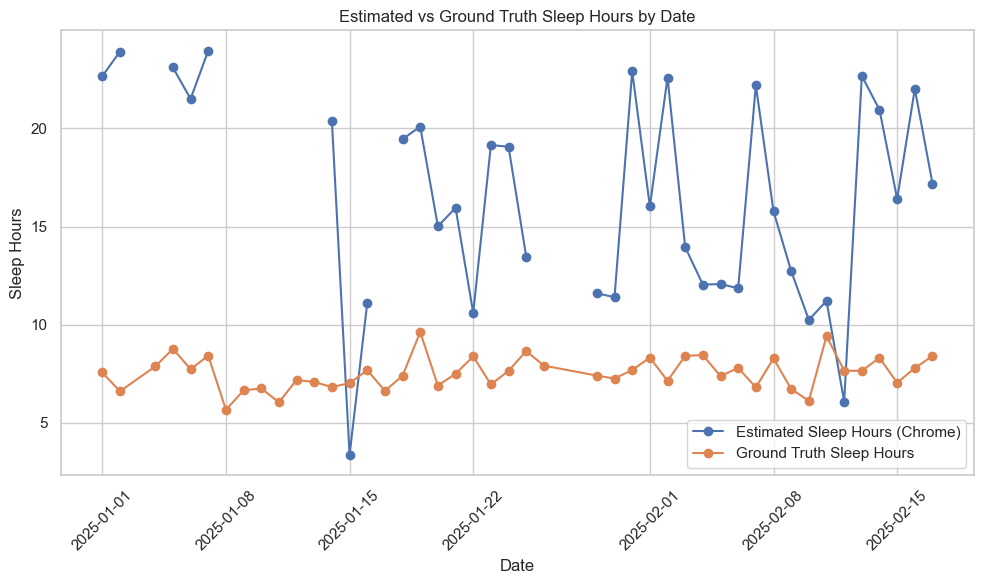

In [130]:
# CHROME HISTORY ESTIMATED SLEEP HOURS VS. GROUND TRUTH HEALTH SLEEP HOURS
df['last_visited_time'] = pd.to_datetime(df['last_visited_time'])
df['first_visited_time'] = pd.to_datetime(df['first_visited_time'])

# Estimate duration based on Chrome
def compute_sleep_duration(row):
    start_time = row['last_visited_time']
    end_time = row['first_visited_time']
    
    # Adjust for crossing midnight
    if end_time < start_time:
        end_time += timedelta(days=1)
    
    duration = end_time - start_time
    hours = duration.total_seconds() / 3600
    return hours

# Apply the function to each row in the DataFrame
df['chrome_estimated_total_sleep_hours'] = df.apply(compute_sleep_duration, axis=1)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['chrome_estimated_total_sleep_hours'], label='Estimated Sleep Hours (Chrome)', marker='o')
plt.plot(df['date'], df['total_sleep_hours'], label='Ground Truth Sleep Hours', marker='o')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.title('Estimated vs Ground Truth Sleep Hours by Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

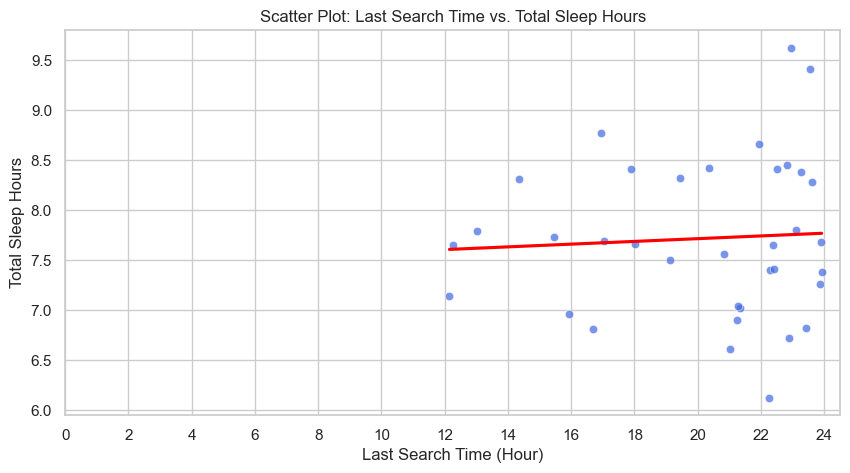

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3833994563.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm")


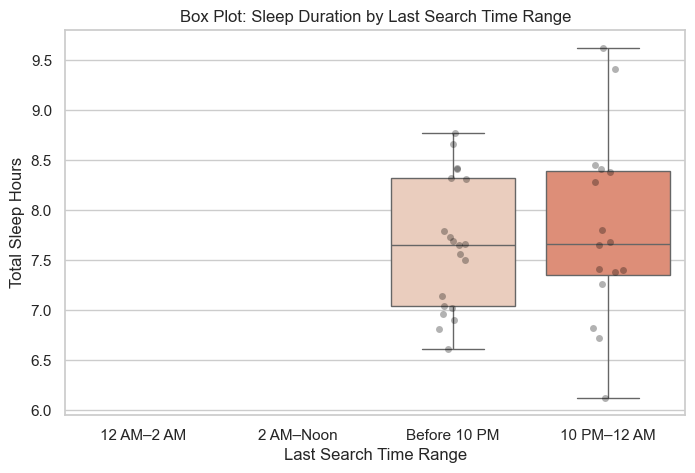

C:\Users\chery\AppData\Local\Temp\ipykernel_14696\3833994563.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")


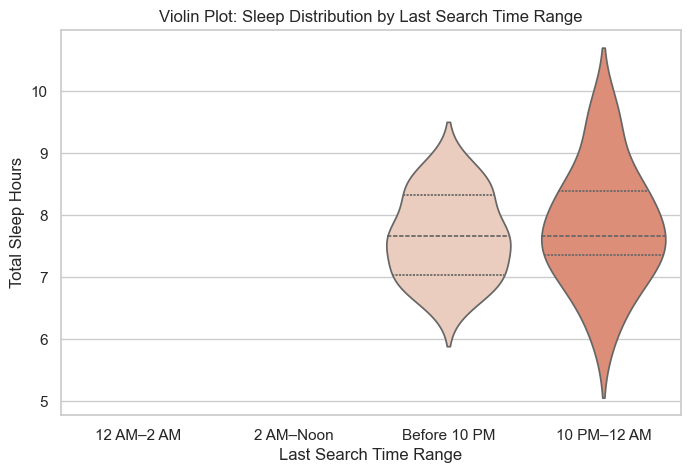

In [131]:
# LAST ACTIVITY TIME BY TOTAL SLEEP DURATION
sns.set_theme(style="whitegrid")

# Convert last search time into a numeric hour for plotting
df["last_search_hour"] = pd.to_datetime(df["last_visited_time"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(df["last_visited_time"], format="%H:%M:%S").dt.minute / 60
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="last_search_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=df, x="last_search_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Search Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Search Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

df["last_search_range"] = pd.cut(
    df["last_search_hour"],
    bins=[0, 2, 12, 22, 24],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["12 AM–2 AM", "2 AM–Noon", "Before 10 PM", "10 PM–12 AM"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=df, x="last_search_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Search Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="last_search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Search Time Range")
plt.show()



Equation of trendline: y = 0.00704x + 7.32
R-squared: 0.082


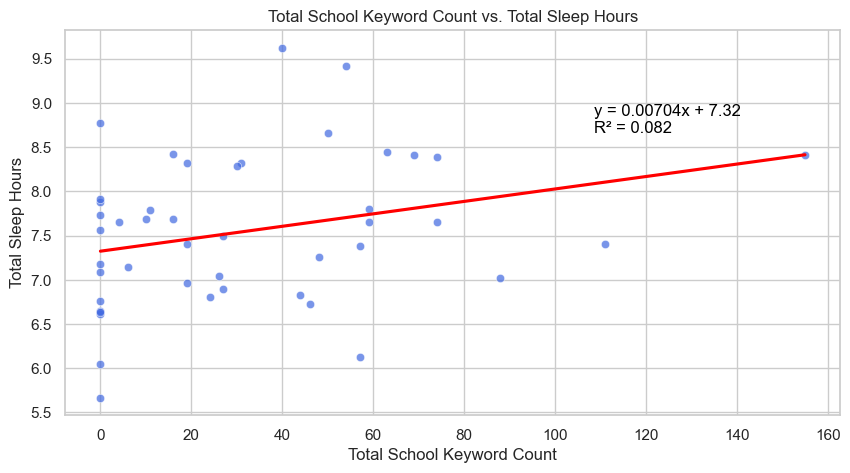

In [132]:
# TOTAL SCHOOL KEYWORD COUNT VS. TOTAL SLEEP HOURS
from scipy.stats import linregress

# Drop NaN values to avoid errors in regression calculation
filtered_df = df.dropna(subset=["total_school_keyword_count", "total_sleep_hours"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df["total_school_keyword_count"], filtered_df["total_sleep_hours"])

# Print equation
print(f"Equation of trendline: y = {slope:.5f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.3f}")  # R-squared value (goodness of fit)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_df, x="total_school_keyword_count", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=filtered_df, x="total_school_keyword_count", y="total_sleep_hours", scatter=False, color="red", ci=None)

# Add equation text to plot
equation_text = f"y = {slope:.5f}x + {intercept:.2f}\nR² = {r_value**2:.3f}"
plt.text(x=filtered_df["total_school_keyword_count"].max() * 0.7, 
         y=filtered_df["total_sleep_hours"].max() * 0.9, 
         s=equation_text, fontsize=12, color="black")

plt.xlabel("Total School Keyword Count")
plt.ylabel("Total Sleep Hours")
plt.title("Total School Keyword Count vs. Total Sleep Hours")
plt.show()

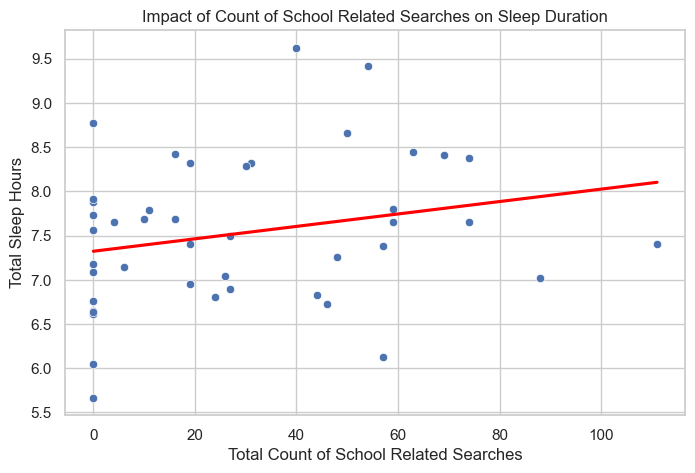

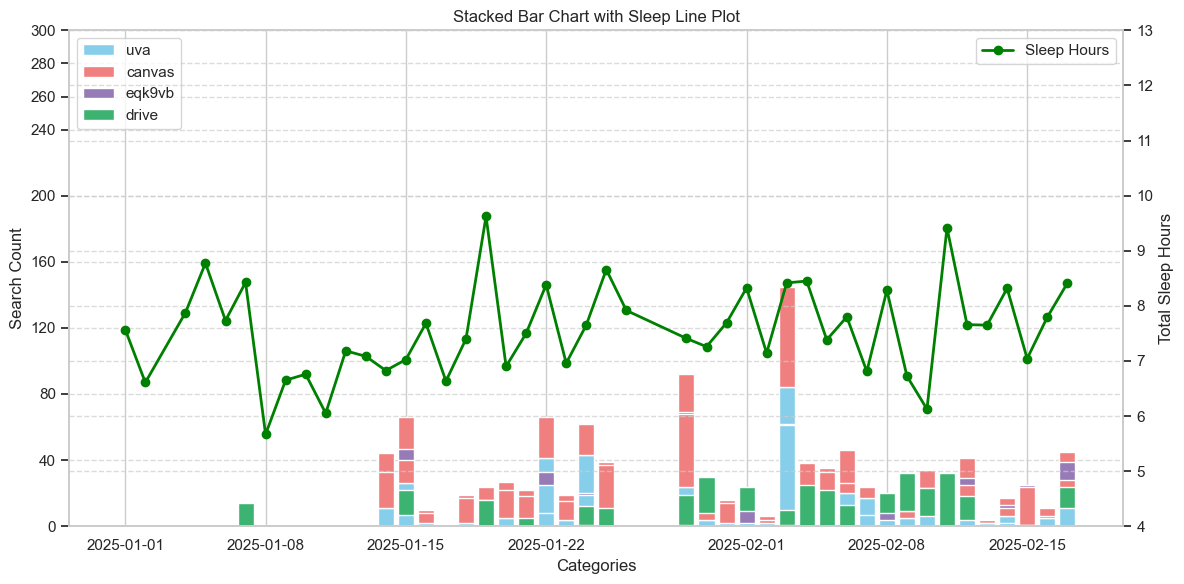

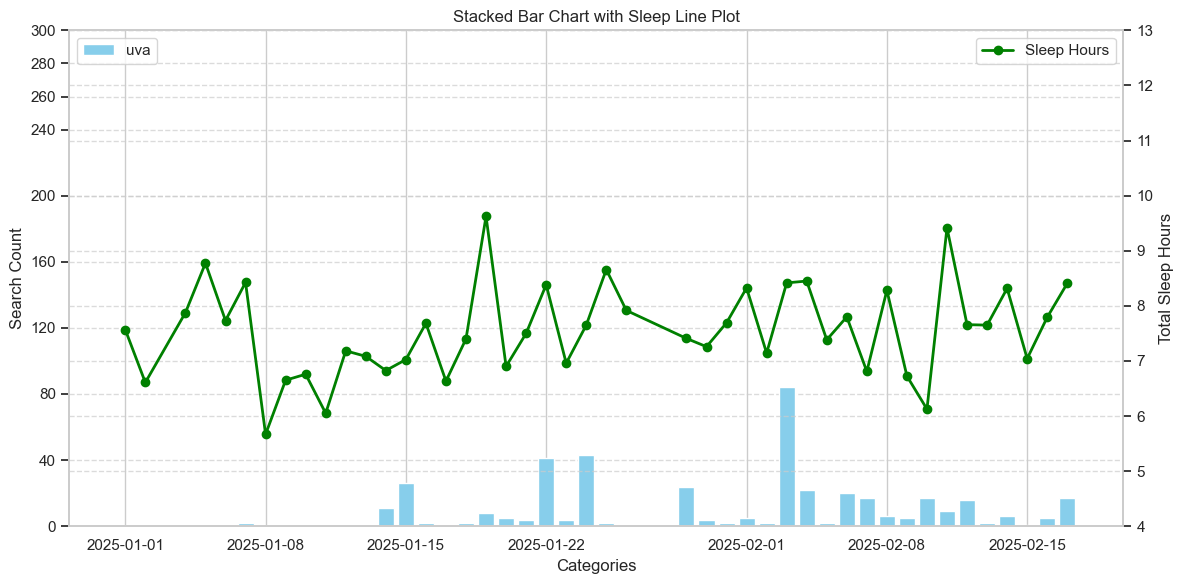

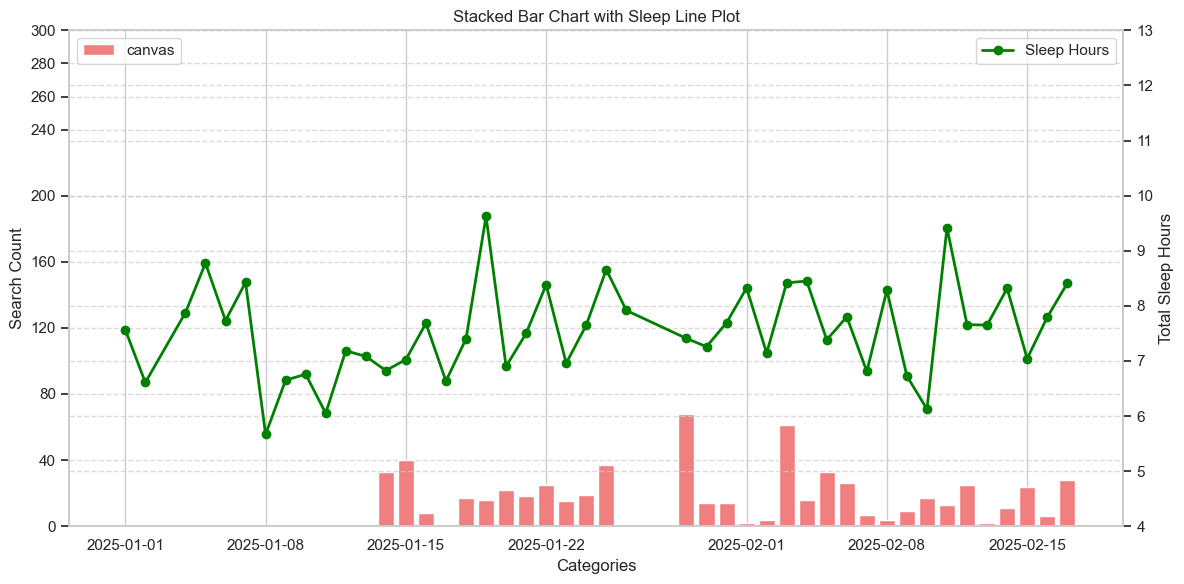

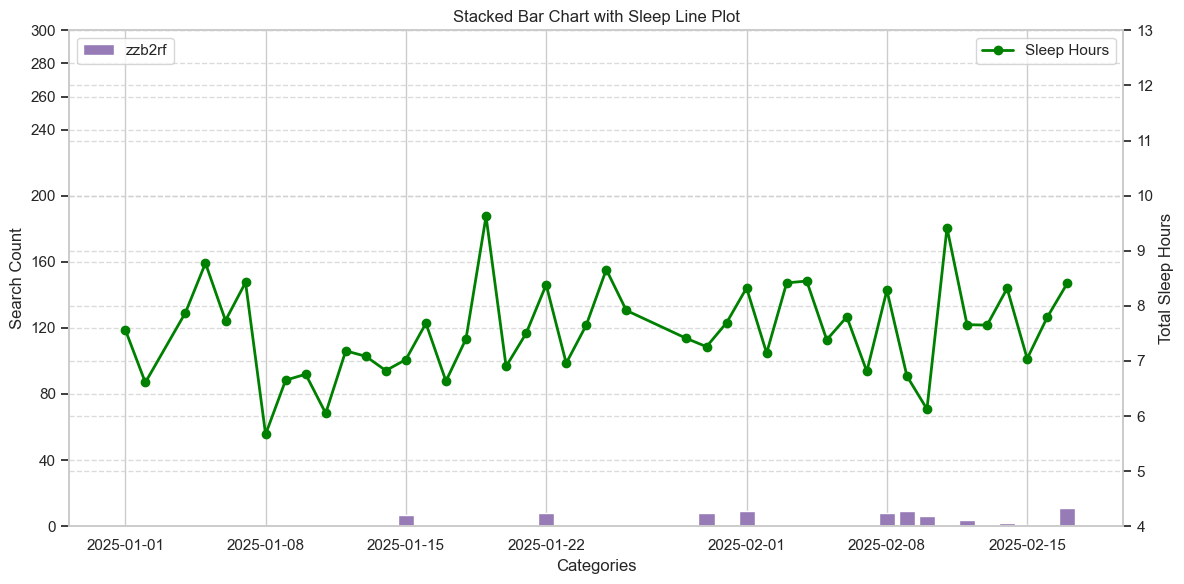

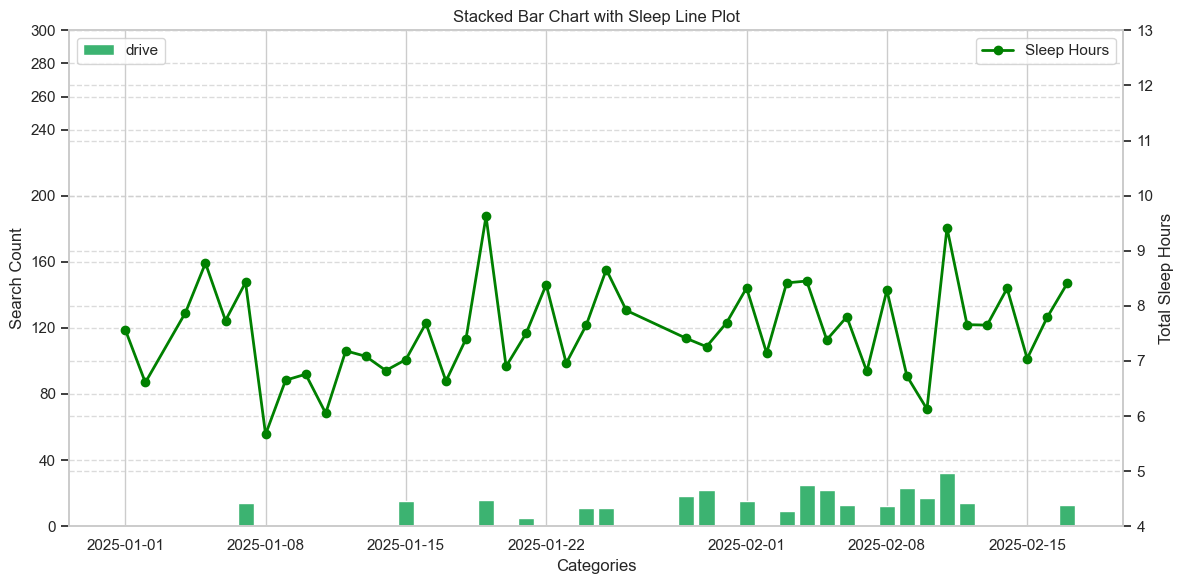

In [133]:
# Total count of school related keyword searches versus sleep hours
limit_search_remove_outliers = df[df['total_school_keyword_count'] <= 140]

plt.figure(figsize=(8,5))
sns.scatterplot(x=limit_search_remove_outliers['total_school_keyword_count'], y=limit_search_remove_outliers["total_sleep_hours"])
sns.regplot(data=limit_search_remove_outliers, x='total_school_keyword_count', y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Total Count of School Related Searches")
plt.ylabel("Total Sleep Hours")
plt.title("Impact of Count of School Related Searches on Sleep Duration")
plt.show()


# School related searches and sleep hours
categories = df['date']
data_series_1 = df['uva']
data_series_2 = df['canvas']
data_series_3 = df['zzb2rf']
data_series_4 = df['drive']
line_data = df['total_sleep_hours']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='uva', color='skyblue')
ax1.bar(categories, data_series_2, bottom=data_series_1, label='canvas', color='lightcoral')
ax1.bar(categories, data_series_3, bottom=data_series_2, label='eqk9vb', color='#967bb6')
ax1.bar(categories, data_series_4, bottom=data_series_3, label='drive', color='#3CB371')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# uva keyword searches
categories = df['date']
data_series_1 = df['uva']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='uva', color='skyblue')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# canvas keyword searches
categories = df['date']
data_series_1 = df['canvas']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='canvas', color='lightcoral')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# zzb2rf keyword searches
categories = df['date']
data_series_1 = df['zzb2rf']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='zzb2rf', color='#967bb6')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# drive keyword searches
categories = df['date']
data_series_1 = df['drive']

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(categories, data_series_1, label='drive', color='#3CB371')

ax1.set_xlabel('Categories')
ax1.set_ylabel('Search Count')
ax1.set_title('Stacked Bar Chart with Sleep Line Plot')

ax2 = ax1.twinx()
ax2.plot(categories, line_data, marker='o', linestyle='-', color='green', label='Sleep Hours', linewidth=2)
ax2.set_ylabel('Total Sleep Hours')
ax2.set_ylim(0, df['total_sleep_hours'].max() + 1)

ax1.set_yticks([0, 40, 80, 120, 160, 200, 240, 260, 280, 300])
ax2.set_yticks([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
ax2.set_ylim(4, 13)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
